In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

## Data Preparation

### Read data into pandas

In [2]:
orig_data_df = pd.read_csv(Path('crypto_data.csv'))
orig_data_df.shape

(1252, 7)

### Discard non-traded currencies; then drop 'IsTrading' column

In [3]:
working_df = orig_data_df
working_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
working_df.drop(working_df[working_df['IsTrading'] == False].index, inplace=True)
working_df.shape

(1144, 7)

In [5]:
working_df = working_df.drop(columns=['IsTrading'])
working_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


### Remove all rows that have at least one null value

In [6]:
working_df = working_df.dropna(how= 'any')
working_df.shape

(685, 6)

### Filter for mined currencies. Total coins mined should be greater than zero.

In [7]:
working_df2 = working_df[working_df['TotalCoinsMined'] > 0]
working_df2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


### Delete 'CoinName' from original dataframe.
* me Q: do we need to have a way to identify the currencies within the model? 

In [8]:
labels = working_df2['CoinName']
working_df2 = working_df2.drop(columns=['CoinName'])
working_df2 = working_df2.set_index('Unnamed: 0')
working_df2

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [9]:
# determining how many new columns to expect
alg_types = working_df2['Algorithm'].nunique()
proof_types = working_df2['ProofType'].nunique()

print(f'The number of algorithm types are: {alg_types}; the number of ProofTypes are: {proof_types}')

The number of algorithm types are: 71; the number of ProofTypes are: 25


In [10]:
# checking values to see if there are any that might be duplicates
alg_unique = working_df2['Algorithm'].unique()
alg_unique.sort()
print(alg_unique)

['1GB AES Pattern Search' '536' 'Argon2d' 'BLAKE256' 'Blake' 'Blake2S'
 'Blake2b' 'C11' 'Cloverhash' 'Counterparty' 'CryptoNight'
 'CryptoNight Heavy' 'CryptoNight-V7' 'Cryptonight-GPU' 'DPoS' 'Dagger'
 'Dagger-Hashimoto' 'ECC 256K1' 'Equihash' 'Equihash+Scrypt' 'Ethash'
 'Exosis' 'Green Protocol' 'Groestl' 'HMQ1725' 'HybridScryptHash256'
 'IMesh' 'Jump Consistent Hash' 'Keccak' 'Leased POS' 'Lyra2RE'
 'Lyra2REv2' 'Lyra2Z' 'M7 POW' 'Multiple' 'NIST5' 'NeoScrypt' 'Ouroboros'
 'PHI1612' 'POS 2.0' 'POS 3.0' 'PoS' 'Proof-of-Authority'
 'Proof-of-BibleHash' 'QUAIT' 'QuBit' 'Quark' 'SHA-256' 'SHA-256 + Hive'
 'SHA-256D' 'SHA-512' 'SHA3' 'Scrypt' 'Semux BFT consensus' 'Shabal256'
 'Skein' 'SkunkHash' 'SkunkHash v2 Raptor' 'Stanford Folding' 'TRC10'
 'Time Travel' 'Tribus' 'VBFT' 'VeChainThor Authority' 'X11' 'X11GOST'
 'X13' 'X14' 'X15' 'X16R' 'XEVAN']


In [11]:
proof_unique = working_df2['ProofType'].unique()
proof_unique.sort()
print(proof_unique)

['DPOS' 'DPoS' 'HPoW' 'LPoS' 'POBh' 'PoA' 'PoC' 'PoS' 'PoS/LPoS' 'PoS/PoW'
 'PoS/PoW/PoT' 'PoST' 'PoW' 'PoW + Hive' 'PoW and PoS' 'PoW/PoS'
 'PoW/PoS ' 'PoW/PoW' 'PoW/nPoS' 'Pos' 'Proof of Authority'
 'Proof of Trust' 'TPoS' 'Zero-Knowledge Proof' 'dPoW/PoW']


In [12]:
# converting items to lowercase so certain values that seem to stand for the same thing 
# will group; eg. DPOS & DPos, PoS & Pos 
working_df2['ProofType'] = working_df2['ProofType'].str.lower()
proof_unique2 = working_df2['ProofType'].unique()
proof_unique2.sort()
print(proof_unique2)

['dpos' 'dpow/pow' 'hpow' 'lpos' 'poa' 'pobh' 'poc' 'pos' 'pos/lpos'
 'pos/pow' 'pos/pow/pot' 'post' 'pow' 'pow + hive' 'pow and pos'
 'pow/npos' 'pow/pos' 'pow/pos ' 'pow/pow' 'proof of authority'
 'proof of trust' 'tpos' 'zero-knowledge proof']


In [13]:
working_df3 = working_df2

In [14]:
# changing "proof of authority" to "poa" because they mean the same thing & should thus be treated as the same in the model
working_df3['ProofType'] = working_df3['ProofType'].replace({'proof of authority': "poa"})
proof_unique3 = working_df3['ProofType'].unique()
len(proof_unique3)

22

### Convert remaining features w text values (i.e., 'Algorithm' & 'Prooftype') into numeric
* use pandas to create dummy variables

In [15]:
dummy_df = pd.get_dummies(working_df3, columns=['ProofType', 'Algorithm'])

In [16]:
dummy_df

,TotalCoinsMined,TotalCoinSupply,ProofType_dpos,ProofType_dpow/pow,ProofType_hpow,ProofType_lpos,ProofType_poa,ProofType_pobh,ProofType_poc,ProofType_pos,...,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dummy_df.columns

Index(['TotalCoinsMined', 'TotalCoinSupply', 'ProofType_dpos',
       'ProofType_dpow/pow', 'ProofType_hpow', 'ProofType_lpos',
       'ProofType_poa', 'ProofType_pobh', 'ProofType_poc', 'ProofType_pos',
       'ProofType_pos/lpos', 'ProofType_pos/pow', 'ProofType_pos/pow/pot',
       'ProofType_post', 'ProofType_pow', 'ProofType_pow + hive',
       'ProofType_pow and pos', 'ProofType_pow/npos', 'ProofType_pow/pos',
       'ProofType_pow/pos ', 'ProofType_pow/pow', 'ProofType_proof of trust',
       'ProofType_tpos', 'ProofType_zero-knowledge proof',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-H

### Examine number of rows & columns in dataset... 
Q: How did they change?
* A: The number of rows remained the same & the number of columns is equal to the number of columns that remain unchanged (i.e., 3) plus a column for each of the 71 algorithm types plus a column for each of the 22 proof types.

In [18]:
crypto_df = dummy_df

### Standardize dataset so columns with larger values do not unduly influence the outcome

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [21]:
scaler = StandardScaler().fit(crypto_df)
crypto_scaled = scaler.transform(crypto_df)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.13840913, ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.09396955, -0.145009  , -0.13840913, ..., -0.08703883,
        -0.08703883, -0.10680283],
       [ 0.52494561,  4.48942416, -0.13840913, ..., -0.08703883,
        -0.08703883, -0.10680283],
       ...,
       [-0.09561336, -0.13217937, -0.13840913, ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.11694817, -0.15255998, -0.13840913, ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.11710536, -0.15285552, -0.13840913, ..., -0.08703883,
        -0.08703883, -0.10680283]])

## Dimensionality Reduction

### Perform dimensional reduction with PCA.
* use explained variance set to 90%
* 'PCA(n_components=0.90)'

In [22]:
# initialize PCA model
pca = PCA(n_components=.90)

crypto_pca = pca.fit_transform(crypto_scaled)

In [23]:
crypto_pca.shape

(532, 74)

#### Q: How did number of features change after reduction?
* A: the number of columns in the data reduced from 95 to 74

### Further reduce dataset with t-SNE & visually inspect results
* run t-SNE on the output from the PCA transformation
* create scatterplot of t-SNE output


In [24]:
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE()

In [25]:
type(crypto_pca)

numpy.ndarray

In [26]:
# Create a new dataframe for t-SNE
crypto_pca_df=pd.DataFrame(crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.342323,1.034475,-0.520879,0.052086,-0.000768,0.002623,-1.333540,0.202799,-0.349157,0.131220,...,-1.282256e-15,1.992159e-16,2.492241e-16,-5.203473e-15,-1.360508e-15,3.076252e-15,3.211965e-15,1.745684e-17,-3.198628e-15,-2.100295e-15
1,-0.325591,1.034557,-0.521428,0.051773,-0.000759,0.002581,-1.336872,0.197443,-0.347932,0.130875,...,-9.430261e-16,-2.205539e-15,7.955956e-16,-4.886299e-15,-1.451678e-15,3.747402e-15,4.238883e-15,1.463913e-15,-2.967619e-15,-3.674554e-16
2,2.310119,1.650785,-0.619065,0.031683,-0.001667,0.002776,-1.669221,-0.863111,-0.022780,-0.554565,...,5.081478e-15,-7.481625e-15,4.624862e-14,6.576605e-14,2.284935e-15,-4.317931e-14,3.352761e-15,-4.863180e-16,3.675596e-14,3.201220e-15
3,-0.149169,-1.321522,0.168593,-0.018061,0.000577,-0.001680,0.308293,0.219733,0.026993,-0.226559,...,3.566559e-17,2.147363e-15,1.074652e-14,8.922547e-15,1.857989e-15,-1.680228e-14,-1.831565e-15,-2.246563e-16,4.222655e-15,-4.773202e-16
4,-0.152480,-2.038567,0.353878,-0.019078,0.000596,-0.000955,0.549344,0.099204,0.146163,-0.111391,...,-5.784288e-14,-2.382376e-14,1.695893e-14,4.673903e-14,-7.996358e-14,5.734540e-15,-2.866697e-14,3.731680e-14,-1.078019e-13,-8.300284e-14


In [27]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features.shape

(532, 2)

In [28]:
tsne_features

array([[ 11.893534 ,  10.702577 ],
       [ 17.365177 ,   6.3732257],
       [ 24.937302 ,  14.178616 ],
       ...,
       [ 13.723808 , -20.886515 ],
       [ -4.628196 , -22.880705 ],
       [-11.853415 ,  -3.673423 ]], dtype=float32)

In [29]:
tsne_features_df = pd.DataFrame(tsne_features)
tsne_features_df

,0,1
0,11.893534,10.702577
1,17.365177,6.373226
2,24.937302,14.178616
3,-32.047497,16.234077
4,3.118342,-22.868019
...,...,...
527,-7.168149,-12.635591
528,18.026657,9.956914
529,13.723808,-20.886515
530,-4.628196,-22.880705


In [30]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

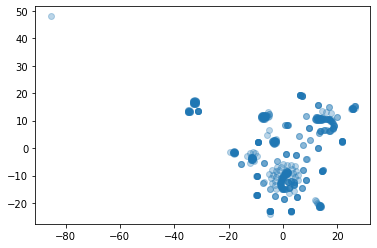

In [31]:
# Visualize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'], alpha=0.3)
plt.show()

#### Q: Are there distinct clusters in the t-SNE scatterplot?
* A: There seems to be 3 very distinct clusters [at approx. (5, -15), (15, 10), and (-35, 15)]. There are a number of smaller clusters throughout where multiple currencies are stacked on top of each other (as can be seen in the areas with the darkest colors). One could maybe argue there is a cluster around (-5, 10), but really, that seems like several distinct clusters near each other more than actually being a single group.

## Cluster Analysis with k-Means
* create an elbow plot to identify the best number of clusters
* use a for-loop to determine the intertia for each 'k' between 1 through 10
* determine, if possible, where the elbow of the plot is, and at which value of 'k' it appears

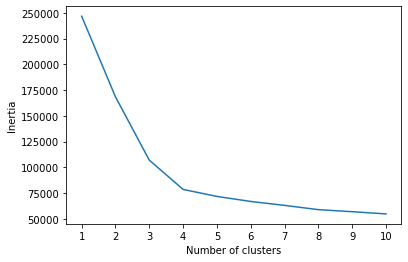

In [32]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Observation
* The primary elbow seems to be at k = 4, with another minor bend at k = 6. When looking at the scatterplot, 4 clusters can be seen relatively quickly.

## Recommendation
* Based on your findings, make a brief (1-2 sentences) recommendation to your clients
* Can the cryptocurrencies be clustered together? If so, into how many clusters?


I would say the currencies have 4 obvious clusters based on the 2d plot (though there seem to be smaller clusters). Being able to plot in additional dimensions might suggest slightly different results. KMeans elbow plot concurs with the suggestion of 4 distinct clusters in the data. It would be interesting to see if some of the smaller clusters (where a number of values seem to be stacked in very specific locations) have closely related algorithms--if so, that could be an argument to make some of those equivalent groups earlier in the data cleaning process.